In [1]:
import pandas as pd

df = pd.read_csv("Telco-Customer-Churn.csv")

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df["Churn"].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [3]:
df = df.drop("customerID", axis=1)

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df = df.dropna()


In [4]:
df = pd.get_dummies(df, drop_first=True)


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop("Churn_Yes", axis=1)
y = df["Churn_Yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
model = LogisticRegression(max_iter=2000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)


0.7874911158493249

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[915, 118],
       [181, 193]])

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [14]:
model = LogisticRegression(max_iter=2000, class_weight='balanced')


In [15]:
# Train model again
model.fit(X_train, y_train)

# Predict
y_pred_bal = model.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred_bal))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bal))

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bal))


Accuracy: 0.7313432835820896
Confusion Matrix:
 [[733 300]
 [ 78 296]]
              precision    recall  f1-score   support

       False       0.90      0.71      0.80      1033
        True       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407



In [17]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Get probabilities instead of direct predictions
y_prob = model.predict_proba(X_test)[:,1]

# Change threshold
threshold = 0.3
y_pred_custom = (y_prob >= threshold).astype(int)

print("New Accuracy:", accuracy_score(y_test, y_pred_custom))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_custom))


New Accuracy: 0.6439232409381663
              precision    recall  f1-score   support

       False       0.95      0.55      0.69      1033
        True       0.42      0.91      0.58       374

    accuracy                           0.64      1407
   macro avg       0.68      0.73      0.63      1407
weighted avg       0.81      0.64      0.66      1407



AUC Score: 0.8316284535463399


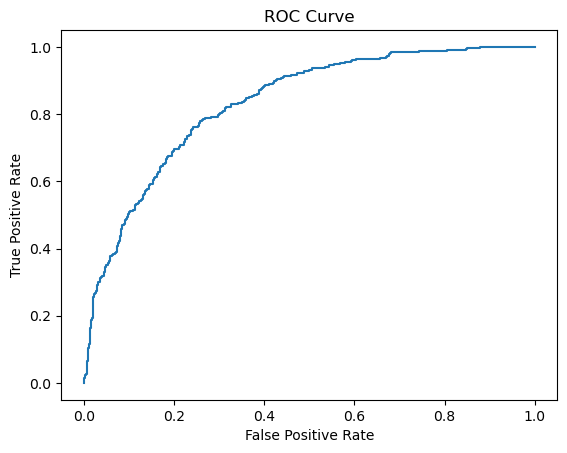

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

print("AUC Score:", auc)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [19]:
import pandas as pd

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

feature_importance.sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
10,InternetService_Fiber optic,0.733778
3,TotalCharges,0.657752
23,StreamingMovies_Yes,0.263129
21,StreamingTV_Yes,0.258066
9,MultipleLines_Yes,0.162098
28,PaymentMethod_Electronic check,0.139128
26,PaperlessBilling_Yes,0.120915
0,SeniorCitizen,0.095168
17,DeviceProtection_Yes,0.051283
5,Partner_Yes,0.020778


In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


RF Accuracy: 0.7810945273631841
              precision    recall  f1-score   support

       False       0.82      0.89      0.86      1033
        True       0.62      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



In [22]:
y_prob = model.predict_proba(X_test)[:,1]


AUC Score: 0.8316284535463399


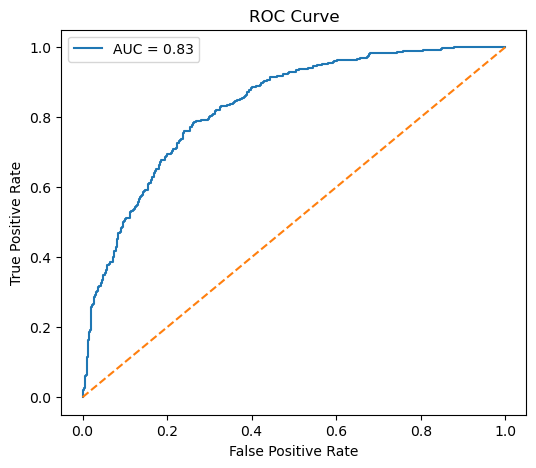

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc)

# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")  # Random model line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [24]:
import pandas as pd

# Get feature names (before scaling)
feature_names = X.columns

# Get coefficients
coefficients = model.coef_[0]

# Create dataframe
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

# Sort by absolute importance
feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(by="Abs_Coefficient", ascending=False)

feature_importance.head(10)


,Feature,Coefficient,Abs_Coefficient
1,tenure,-1.354457,1.354457
2,MonthlyCharges,-0.872060,0.872060
10,InternetService_Fiber optic,0.733778,0.733778
3,TotalCharges,0.657752,0.657752
25,Contract_Two year,-0.606754,0.606754
24,Contract_One year,-0.328937,0.328937
23,StreamingMovies_Yes,0.263129,0.263129
21,StreamingTV_Yes,0.258066,0.258066
9,MultipleLines_Yes,0.162098,0.162098
28,PaymentMethod_Electronic check,0.139128,0.139128


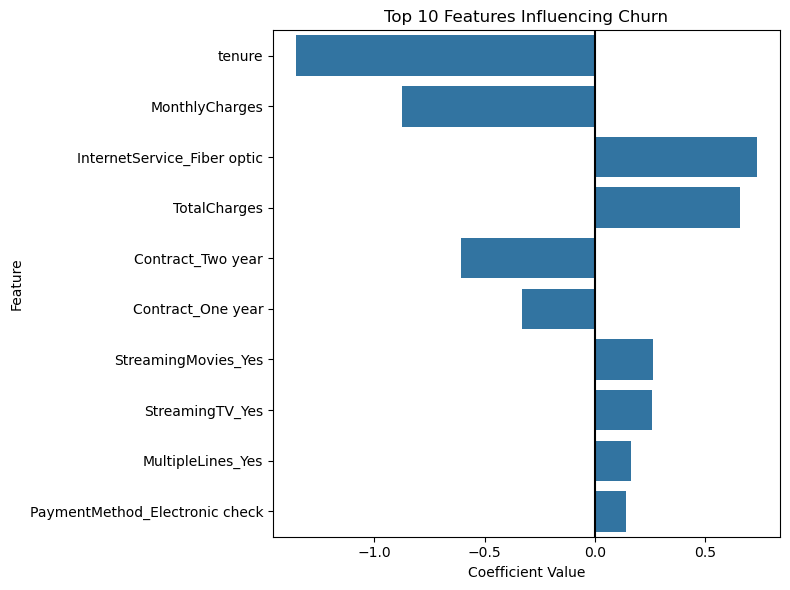

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 features
top_features = feature_importance.head(10)

plt.figure(figsize=(8,6))
sns.barplot(
    x="Coefficient",
    y="Feature",
    data=top_features
)

plt.title("Top 10 Features Influencing Churn")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.axvline(0, color='black')
plt.tight_layout()
plt.show()


<Axes: xlabel='Abs_Coefficient', ylabel='Feature'>

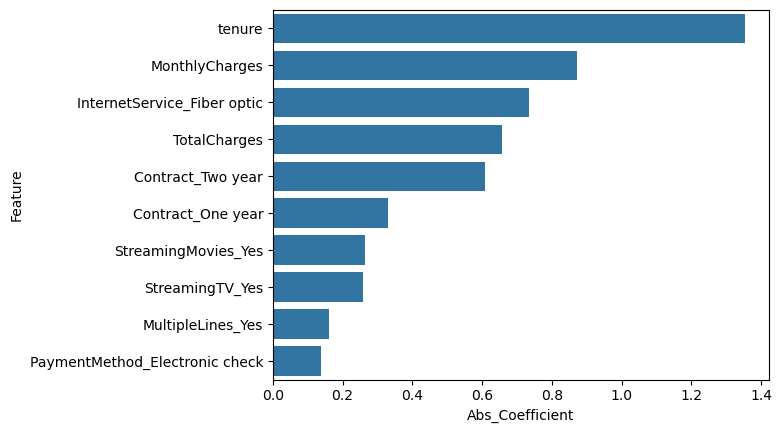

In [26]:
sns.barplot(
    x="Abs_Coefficient",
    y="Feature",
    data=top_features
)


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# AUC Score
print("Random Forest AUC:", roc_auc_score(y_test, y_prob_rf))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Classification Report
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7931769722814499
Random Forest AUC: 0.8185687810282082
Confusion Matrix:
 [[937  96]
 [195 179]]
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1033
        True       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



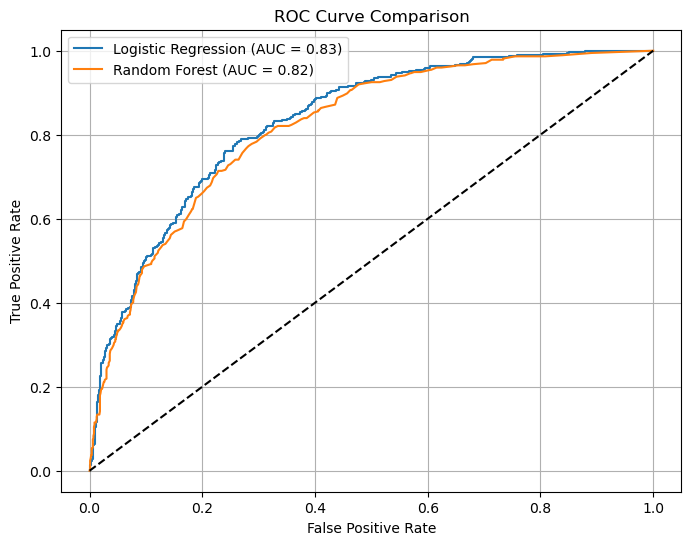

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Logistic Regression probabilities
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob)
roc_auc_log = auc(fpr_log, tpr_log)

# Random Forest probabilities
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()


In [29]:
!pip install xgboost


   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
   - -------------------------------------- 4.5/101.7 MB 19.1 MB/s eta 0:00:06
   - -------------------------------------- 5.0/101.7 MB 11.8 MB/s eta 0:00:09
   -- ------------------------------------- 5.8/101.7 MB 9.1 MB/s eta 0:00:11
   -- ------------------------------------- 6.6/101.7 MB 7.5 MB/s eta 0:00:13
   -- ------------------------------------- 7.3/101.7 MB 6.9 MB/s eta 0:00:14
   --- ------------------------------------ 7.9/101.7 MB 6.6 MB/s eta 0:00:15
   --- ------------------------------------ 8.7/101.7 MB 6.0 MB/s eta 0:00:16
   --- ------------------------------------ 9.4/101.7 MB 5.7 MB/s eta 0:00:17
   ---- ----------------------------------- 10.5/101.7 MB 5.4 MB/s eta 0:00:18
   ---- ----------------------------------- 11.0/101.7 MB 5.2 MB/s eta 0:00:18
   ---- ----------------------------------- 11.8/101.7 MB 4.9 MB/s eta 0:0

In [31]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Create model
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=4,-
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost AUC:", roc_auc_score(y_test, y_prob_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


C:\Users\ejaga\anaconda3\Lib\site-packages\xgboost\training.py:200: UserWarning: [10:13:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7889125799573561
XGBoost AUC: 0.8280888435634749

Confusion Matrix:
 [[917 116]
 [181 193]]

Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.89      0.86      1033
        True       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Base model
log_reg = LogisticRegression(max_iter=5000)

# GridSearch
grid = GridSearchCV(
    log_reg,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit
grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)
print("Best AUC Score:", grid.best_score_)


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best AUC Score: 0.8482156016422782


In [33]:
best_model = grid.best_estimator_

y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score

print("Test AUC:", roc_auc_score(y_test, y_prob_best))


Test AUC: 0.831698339812912


In [34]:
# Best tuned model use karo
final_model = best_model

# Probabilities nikaalo
y_prob_final = final_model.predict_proba(X_test)[:, 1]

# Business threshold
threshold = 0.3

y_pred_business = (y_prob_final >= threshold).astype(int)


In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

print("Business Accuracy:", accuracy_score(y_test, y_pred_business))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_business))
print("\nClassification Report:\n", classification_report(y_test, y_pred_business))
print("\nAUC:", roc_auc_score(y_test, y_prob_final))


Business Accuracy: 0.7540867093105899

Confusion Matrix:
 [[774 259]
 [ 87 287]]

Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.75      0.82      1033
        True       0.53      0.77      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.77      1407


AUC: 0.831698339812912


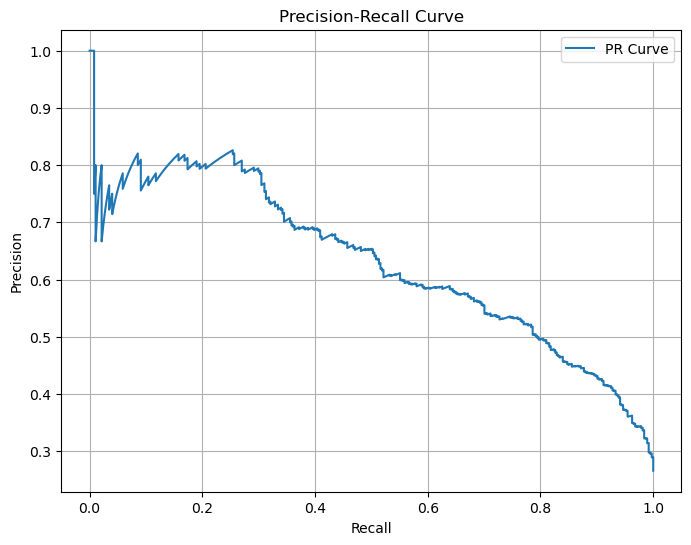

In [36]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Probabilities
y_scores = y_prob_final  # already calculated from best_model

# Precision & Recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label="PR Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


In [37]:
from sklearn.metrics import auc

pr_auc = auc(recall, precision)
print("PR AUC:", pr_auc)


PR AUC: 0.6303153019424135


In [38]:
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]

print("Best Threshold:", best_threshold)
print("Best F1 Score:", f1_scores[best_index])


Best Threshold: 0.30832800891329604
Best F1 Score: 0.6271929824077572


In [39]:
y_pred_optimal = (y_scores >= best_threshold).astype(int)

print("\nOptimized Classification Report:\n")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_optimal))



Optimized Classification Report:

              precision    recall  f1-score   support

       False       0.90      0.76      0.82      1033
        True       0.53      0.76      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.76      0.72      1407
weighted avg       0.80      0.76      0.77      1407



In [40]:
avg_monthly = df['MonthlyCharges'].mean()
print("Average Monthly Revenue per customer:", avg_monthly)


Average Monthly Revenue per customer: 64.79820819112628


In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_optimal)

TP = cm[1,1]   # churn correctly predicted
FP = cm[0,1]
FN = cm[1,0]

print("True Positives:", TP)


True Positives: 286


In [42]:
months = 6

revenue_saved = TP * avg_monthly * months

print("Estimated Revenue Saved:", revenue_saved)


Estimated Revenue Saved: 111193.72525597268


In [43]:
retention_cost = (TP + FP) * 500
net_gain = revenue_saved - retention_cost

print("Net Business Gain:", net_gain)


Net Business Gain: -157806.27474402732


In [44]:
pip install shap


   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 549.1/549.1 kB 4.8 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   --------------------

In [45]:
import shap


In [46]:
explainer = shap.LinearExplainer(best_model, X_train)
shap_values = explainer.shap_values(X_test)


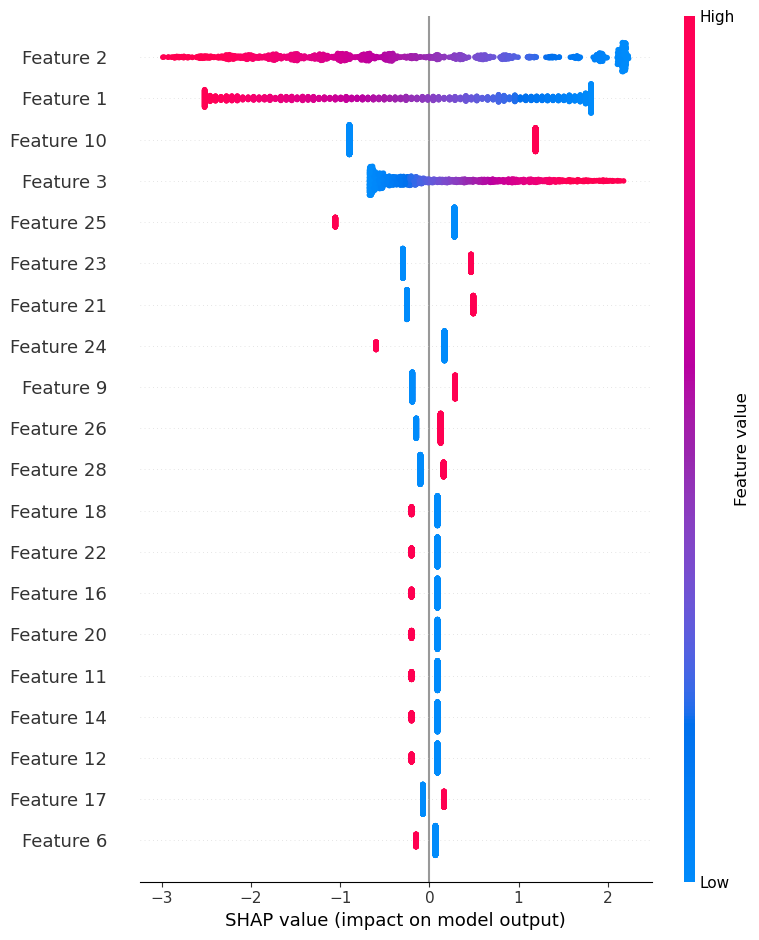

In [47]:
shap.summary_plot(shap_values, X_test)


In [52]:
import shap
shap.initjs()


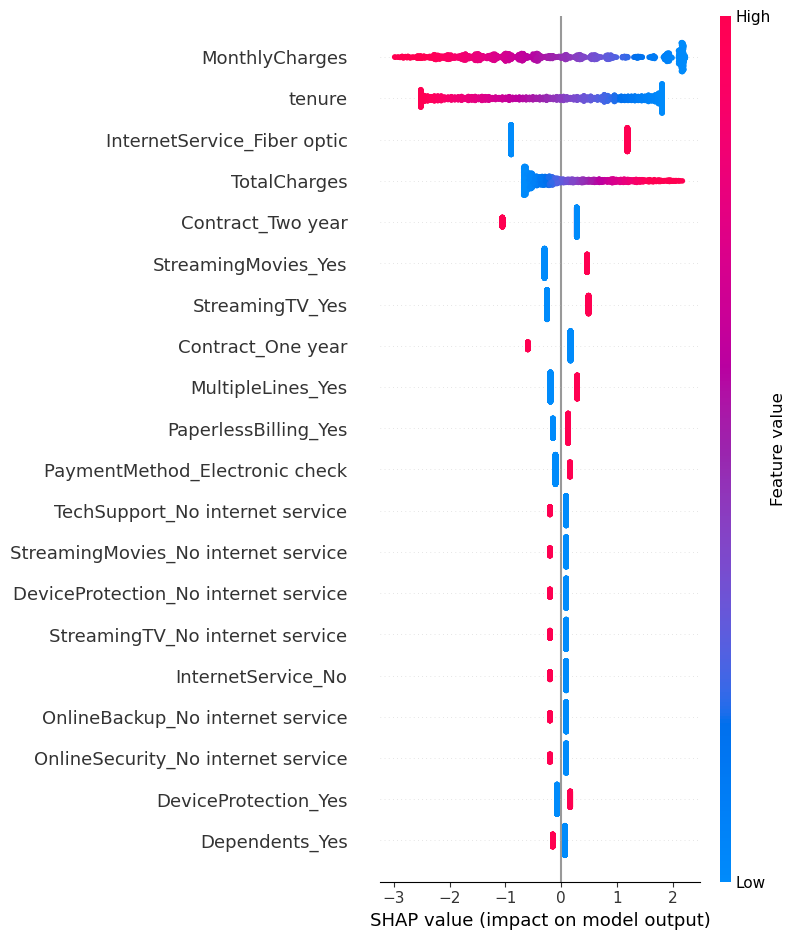

In [53]:
shap.summary_plot(shap_values, X_test_df)


In [54]:
import pandas as pd

X_test_df = pd.DataFrame(X_test, columns=feature_names)


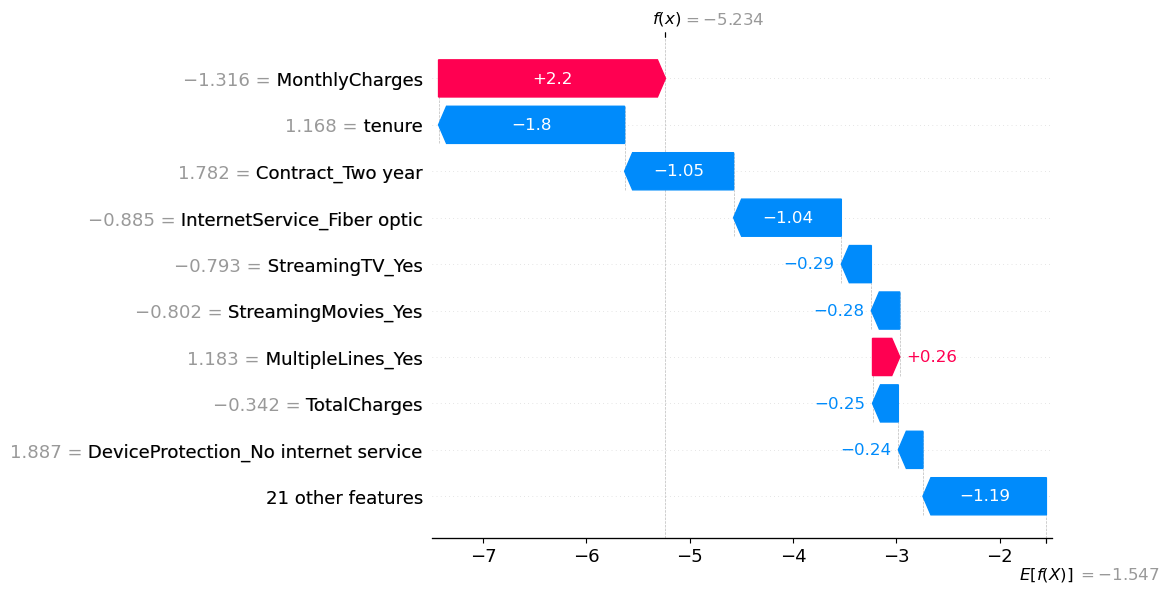

In [55]:
explainer = shap.Explainer(best_model, X_test_df)
shap_values = explainer(X_test_df)

shap.plots.waterfall(shap_values[0])


In [56]:
import shap

explainer = shap.Explainer(best_model, X_test_df)
shap_values = explainer(X_test_df)


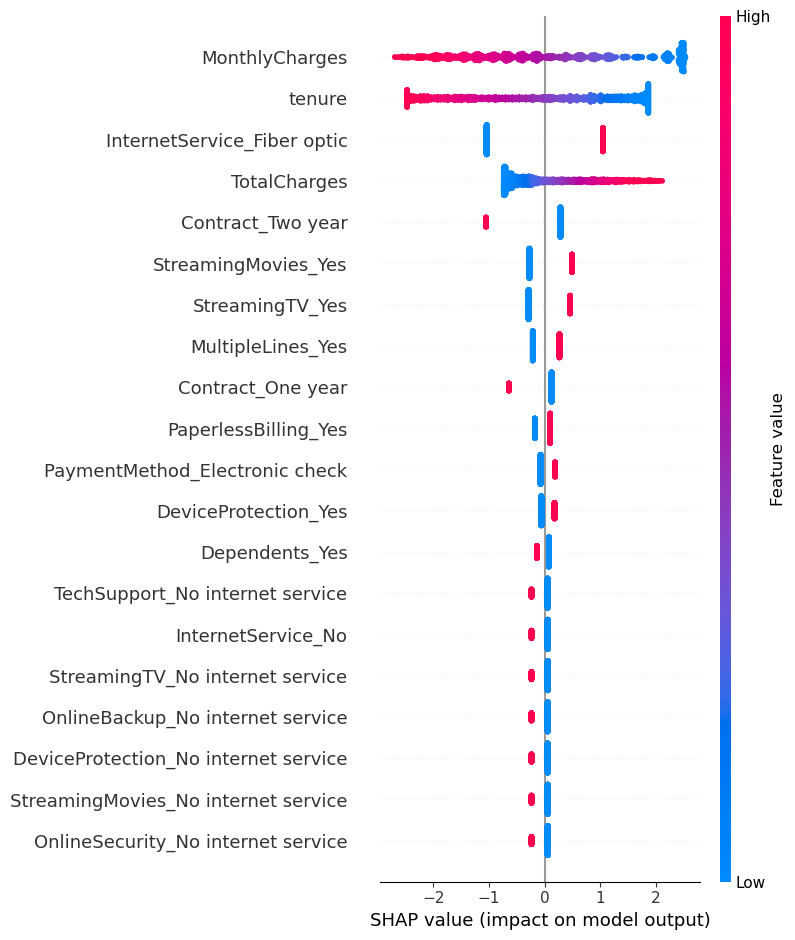

In [57]:
shap.summary_plot(shap_values, X_test_df)


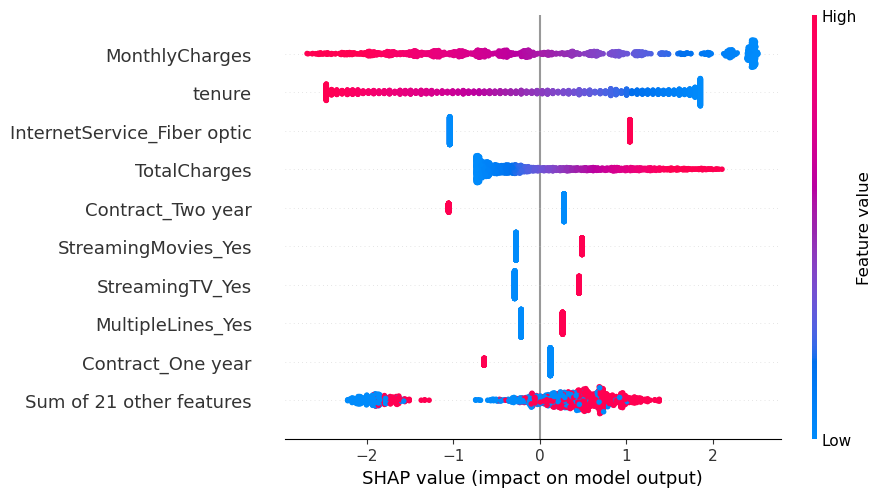

In [58]:
shap.plots.beeswarm(shap_values)
